# Solution to Assignment A1


Team J
- Hardik Bishnoi
- B Dhanush Adhitya
- Aishwarya Ravichandran

In [1]:
import pandas as pd
import re
from symspellpy import SymSpell, Verbosity
import pkg_resources
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('data/patient_notes.csv', usecols=[2], encoding='utf-8')

In [3]:
# print(df['pn_history'])
print(df[:20])

                                           pn_history
0   17-year-old male, has come to the student heal...
1   17 yo male with recurrent palpitations for the...
2   Dillon Cleveland is a 17 y.o. male patient wit...
3   a 17 yo m c/o palpitation started 3 mos ago; \...
4   17yo male with no pmh here for evaluation of p...
5   17 yo m, presenting with palpitations/increase...
6   17 yo male presents with 3-4 month history of ...
7   17 yo male presents with a 2-3 month history o...
8   HPI: 17 YO complains of intermittent heart pal...
9   Mr. Cleveland is a 17 yo M who presents to cli...
10  Mr. Cleveland is a 17 year old male with no si...
11  Dillon Cleveland is a 17 year old male with no...
12  Patient is a 17 yo male presenting to student ...
13  17 yr old boy complaining of heart pounding fo...
14  17 year old male with no significant PMH. Comp...
15  Mr. Cleveland is a 17 yo male who presents tod...
16  HPI: 17yo M presents with palpitations. Patien...
17  17 yo male presents with

In [4]:
df['pn_history'] = df['pn_history'].apply(lambda x: x.lower())

In [5]:
df['pn_history'] = df['pn_history'].apply(lambda x: re.sub(r'[!@#$%^&*()_+=\-~`;:\'",.<>/?|\\]', '', x))

In [6]:
df['pn_history'] = df['pn_history'].apply(lambda x: re.sub(r'(\d{1,2})/(\d{1,2})/(\d{4})', r'\2-\1-\3', x))

In [7]:
import contractions

df['pn_history'] = df['pn_history'].apply(lambda x: contractions.fix(x))

In [8]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
additional_stopwords = {'is', 'of', 'an'}

stop_words.update(additional_stopwords)
df['stopwords_removed'] = df['pn_history'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df['pn_history'][0]

'17yearold male has come to the student health clinic complaining of heart pounding mr clevelands mother has given verbal consent for a history physical examination and treatment\r\nbegan 23 months agosuddenintermittent for 2 dayslasting 34 minworseningnonallevaggrav\r\nassociated with dispnea on exersion and reststressed out about school\r\nreports fe feels like his heart is jumping out of his chest\r\nrosdenies chest paindyaphoresiswt losschillsfevernauseavomitingpedal edeam\r\npmhnonmeds aderol from a friendnkda\r\nfhfather had mi recentlymother has thyroid dz\r\nshnonsmokermariguana 56 months ago3 beers on the weekend basketball at school\r\nshno std'

In [10]:
df

,pn_history,stopwords_removed
0,17yearold male has come to the student health ...,17yearold male come student health clinic comp...
1,17 yo male with recurrent palpitations for the...,17 yo male recurrent palpitations past 3 mo la...
2,dillon cleveland is a 17 yo male patient with ...,dillon cleveland 17 yo male patient significan...
3,a 17 yo m co palpitation started 3 mos ago \r\...,17 yo co palpitation started 3 mos ago nothing...
4,17yo male with no pmh here for evaluation of p...,17yo male pmh evaluation palpitations states l...
...,...,...
42141,ms madden is a 20 yo female presenting w the w...,ms madden 20 yo female presenting w worst ha l...
42142,a 20 yo f came complain a dull 810 headache th...,20 yo f came complain dull 810 headache associ...
42143,ms madden is a 20yo female who presents with a...,ms madden 20yo female presents headache 1 days...
42144,stephanie madden is a 20 year old woman compla...,stephanie madden 20 year old woman complaining...


# Normalizing data

Data normalization is important to reduce sparseness and remove faulty aspects of the data.

# Spell Correction

In [11]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
sym_spell.load_dictionary( dictionary_path,term_index=0, count_index=1)

True

In [ ]:
def correct_spelling(text):
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    return suggestions[0].term if suggestions else text

df['corrected_notes'] = df['stopwords_removed'].apply(correct_spelling)

In [ ]:
# df.to_csv('processed_notes.csv', index=False)

In [13]:
processed = pd.read_csv('data/processed_notes.csv')

# Splitting joined words

In [ ]:
import wordninja

for x in range(len(processed['corrected_notes'])):
    tokens = word_tokenize(processed['corrected_notes'][x])
    for i in range(len(tokens)):
        for x in wordninja.split(tokens[i]):
            tokens.append(x)
        
    processed['corrected_notes'][x] = ' '.join(tokens)

In [35]:
# processed.to_csv('data/processed_notes.csv', index=False)

In [1]:
# loading the .csv file and storing it in processed_df variable
import pandas as pd
processed = pd.read_csv("data/processed_notes.csv")

# Removing Alphanumerics
Let's remove numbers/alphanumerics from the column because a lot of unwanted alphanumeric tokens populate the dataset. There will be some information loss about dosages, but since these dosages often require context and are either very repititive or too rare as tokens, they are not as useful to the machine as more clean, uniform data.

In [2]:
processed['corrected_notes'] = processed['corrected_notes'].str.replace('\d+', '', regex=True)

print(processed['corrected_notes'])

0        year old male come student health clinic compl...
1        of to male recurrent palpitations past a to la...
2        dillon cleveland of to male patient significan...
3        of to co palpitation started a mos ago nothing...
4        mayo male pm evaluation palpitations states la...
                               ...                        
42141    is madden of to female presenting a worst a li...
42142    of of came complain dull a of headache associa...
42143    is madden mayo female presents headache a days...
42144    stephanie madden of year old woman complaining...
42145    patient of of presents headache said never som...
Name: corrected_notes, Length: 42146, dtype: object


# Lemmatization and Stemming

In [3]:
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Stemming and lemmatizing the words in the lemmatized_notes column
processed['stemmed_notes'] = processed['corrected_notes'].apply(lambda x: ' '.join([lemmatizer.lemmatize(stemmer.stem(word)) for word in x.split()]))

stemmer = PorterStemmer()

# Stemming the words in the lemmatized_notes column
processed['stemmed_notes'] = processed['stemmed_notes'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [4]:
processed.to_csv('data/stemmed_notes.csv', index=False)

In [91]:
import pandas as pd
processed = pd.read_csv('data/stemmed_notes.csv')


# Creating TF-IDF DTM

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Creating the TF-IDF matrix with the stemmed notes
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=4)
dtm = tfidf_vectorizer.fit_transform(processed['stemmed_notes'].astype(str))

# Converting it to a data frame
dtm_df = pd.DataFrame(dtm.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Printing the data frame obtained
print(dtm_df)

       aah   ab  abat  abdomen   abdomin  abel  abil       abl  abnorm  abort  \
0      0.0  0.0   0.0      0.0  0.000000   0.0   0.0  0.000000     0.0    0.0   
1      0.0  0.0   0.0      0.0  0.000000   0.0   0.0  0.179275     0.0    0.0   
2      0.0  0.0   0.0      0.0  0.000000   0.0   0.0  0.000000     0.0    0.0   
3      0.0  0.0   0.0      0.0  0.086991   0.0   0.0  0.000000     0.0    0.0   
4      0.0  0.0   0.0      0.0  0.000000   0.0   0.0  0.000000     0.0    0.0   
...    ...  ...   ...      ...       ...   ...   ...       ...     ...    ...   
42141  0.0  0.0   0.0      0.0  0.000000   0.0   0.0  0.000000     0.0    0.0   
42142  0.0  0.0   0.0      0.0  0.000000   0.0   0.0  0.000000     0.0    0.0   
42143  0.0  0.0   0.0      0.0  0.000000   0.0   0.0  0.000000     0.0    0.0   
42144  0.0  0.0   0.0      0.0  0.000000   0.0   0.0  0.000000     0.0    0.0   
42145  0.0  0.0   0.0      0.0  0.086818   0.0   0.0  0.000000     0.0    0.0   

       ...  yoga  young  yo

In [93]:
dtm_df.columns[800:900]

Index(['complet', 'complex', 'compli', 'complianc', 'compliant', 'complic',
       'compo', 'compon', 'comprehen', 'compri', 'compromi', 'compul',
       'comput', 'conc', 'conceiv', 'concent', 'concentr', 'concept',
       'concern', 'conci', 'conclud', 'concomit', 'concomitantli', 'concurr',
       'condit', 'condo', 'condom', 'condominium', 'condon', 'conduct',
       'confid', 'confin', 'confirm', 'conflict', 'confoc', 'confu',
       'congenit', 'congest', 'conjunct', 'connect', 'conrad', 'conscienc',
       'consciou', 'consecut', 'consent', 'consequ', 'conserv', 'consid',
       'consist', 'constant', 'constantli', 'constip', 'constitut', 'constr',
       'constrict', 'construct', 'constructor', 'consult', 'consum',
       'consumpt', 'cont', 'contact', 'contacttraveltrauma', 'contain',
       'contempl', 'content', 'context', 'continu', 'contra', 'contracept',
       'contract', 'contractor', 'contrib', 'contribut', 'contributor',
       'contributori', 'control', 'conveni', 'c

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
pca_x = pca.fit_transform(dtm.toarray())
df_pca = pd.DataFrame(pca_x)
df_pca.shape

(42146, 1000)

In [47]:
df_pca.to_csv('data/pca.csv', index=False)

# Machine Learning Implementation

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

In [18]:
df_pca = pd.read_csv('data/pca.csv')
processed = pd.read_csv('data/stemmed_notes.csv')

let's join 'case_num' from the original csv to compare our results at the end

In [19]:
caseno = pd.read_csv('data/patient_notes.csv', usecols=[1], encoding='utf-8')

In [20]:
processed['case_num'] = caseno['case_num']

Let us first try to use the dtm directly to make clusters and do dimensionality reduction AFTER we make the clusters.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


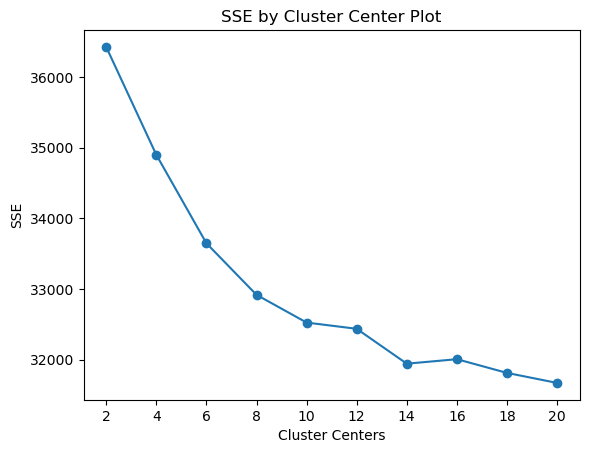

In [23]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(dtm, 20)

We see that 10 - 20 clusters may be the efficient value due to lower SSE

In [55]:
clusters = MiniBatchKMeans(n_clusters=10, batch_size=4096, random_state=20).fit_predict(dtm)

In [56]:
processed['normal_clusters'] = clusters

In [57]:
processed['normal_clusters'].value_counts()

normal_clusters
1    9735
4    6025
8    5627
0    5139
2    4189
7    3361
5    2239
3    2197
6    2041
9    1593
Name: count, dtype: int64

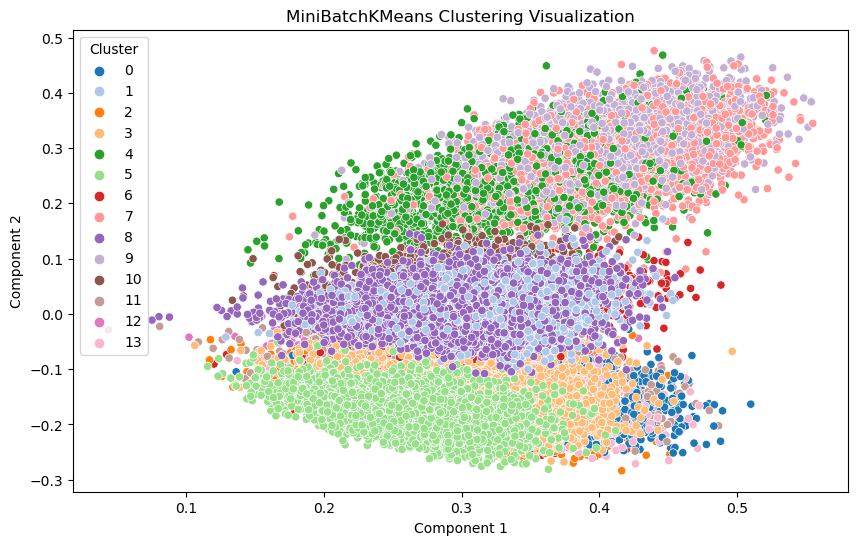

In [28]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
svd = TruncatedSVD(n_components=2)
dtm_2d = svd.fit_transform(dtm)


df = pd.DataFrame(dtm_2d, columns=['Component 1', 'Component 2'])
df['Cluster'] = clusters

# Plot clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='Cluster', palette='tab20')
plt.title('MiniBatchKMeans Clustering Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()

However, we can see there's a lot of cluster overlap. This is generally the result of reducing the data to 2 dimensions using SVD. Let's try 3 dimensions instead.

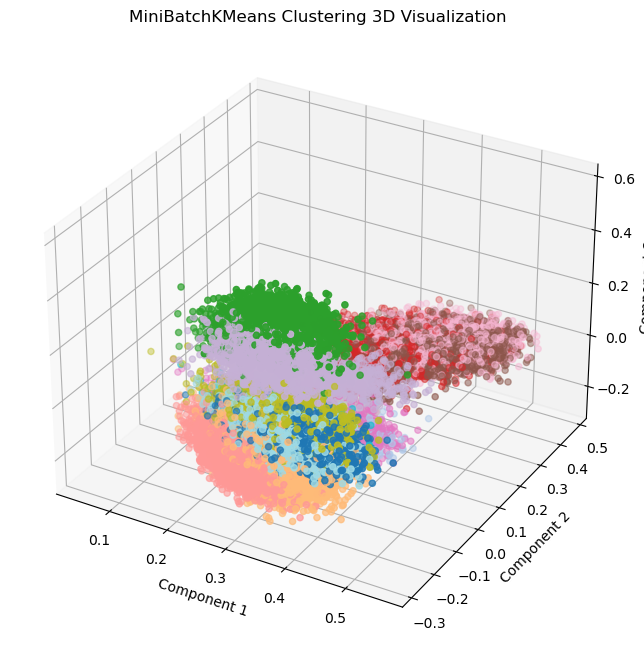

In [29]:
svd = TruncatedSVD(n_components=3)
dtm_3d = svd.fit_transform(dtm)


df = pd.DataFrame(dtm_3d, columns=['Component 1', 'Component 2', 'Component 3'])
df['Cluster'] = clusters


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Component 1'], df['Component 2'], df['Component 3'], c=df['Cluster'], cmap='tab20')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('MiniBatchKMeans Clustering 3D Visualization')

plt.show()


We can still see a lot of overlap, which is expected.

Now let us try reducing the dimensionality to 1000 first, and then doing clustering

In [30]:
pca_clusters = MiniBatchKMeans(n_clusters=10, batch_size=4096, random_state=1).fit_predict(df_pca)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [31]:
processed['pca_clusters'] = pca_clusters

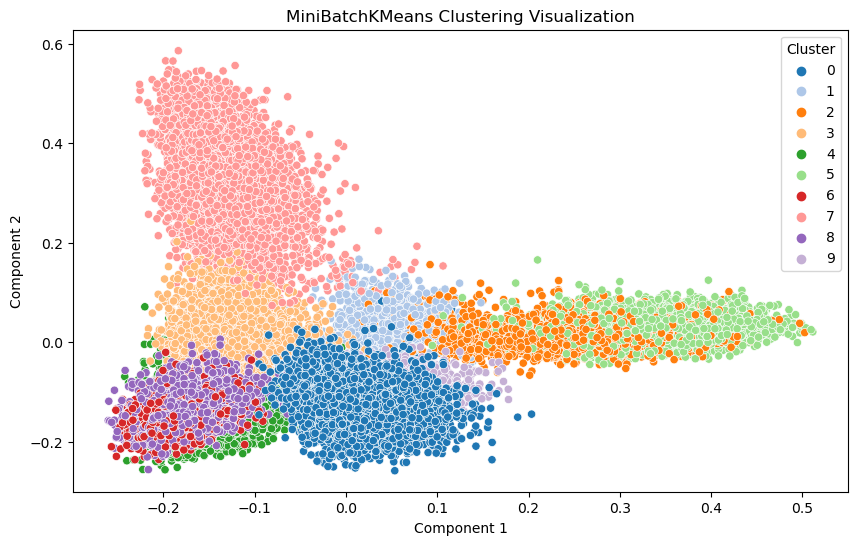

In [33]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
svd = TruncatedSVD(n_components=2)
dtm_2d = svd.fit_transform(df_pca)


df = pd.DataFrame(dtm_2d, columns=['Component 1', 'Component 2'])
df['Cluster'] = pca_clusters

# Plot clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='Cluster', palette='tab20')
plt.title('MiniBatchKMeans Clustering Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()

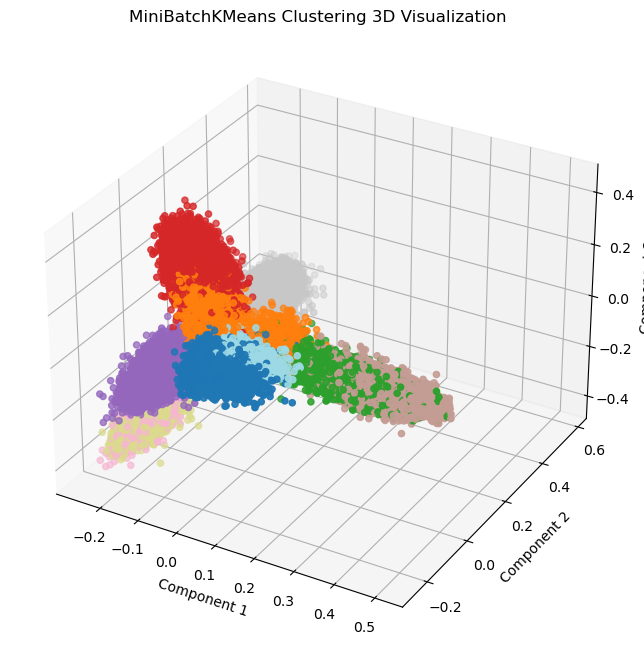

In [34]:
svd = TruncatedSVD(n_components=3)
dtm_3d = svd.fit_transform(df_pca)


df = pd.DataFrame(dtm_3d, columns=['Component 1', 'Component 2', 'Component 3'])
df['Cluster'] = pca_clusters


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Component 1'], df['Component 2'], df['Component 3'], c=df['Cluster'], cmap='tab20')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('MiniBatchKMeans Clustering 3D Visualization')

plt.show()

We can see that the clusters are much more distinct here.

Let us try HDBSCAN with PCA first but this time with dimensionality reduced to 10 (according to experimentation 10 proved to be the best number in making distinct clusters)

In [35]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10)
pca_new = svd.fit_transform(df_pca)

In [36]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=50, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(pca_new)

In [37]:
processed['hdbscan_clusters'] = cluster_labels

Text(0.5, 0.92, 'MiniBatchKMeans Clustering 3D Visualization')

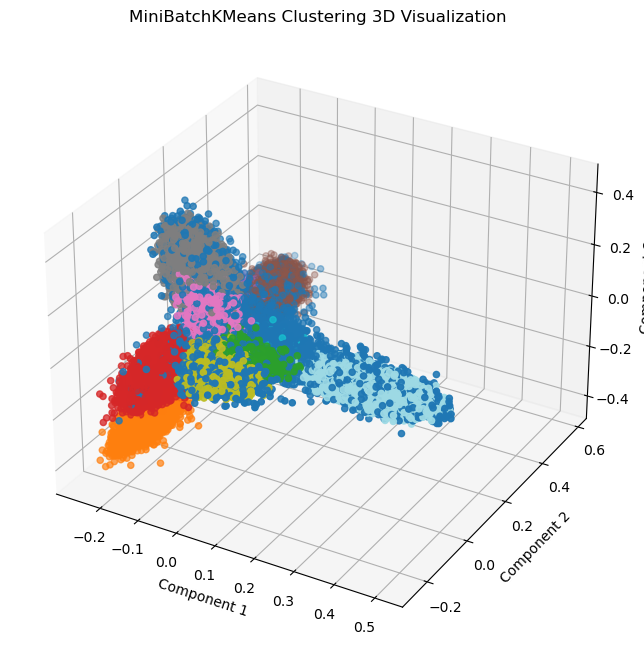

In [38]:
svd = TruncatedSVD(n_components=3)
pca_3d = svd.fit_transform(df_pca)

df = pd.DataFrame(pca_3d, columns=['Component 1', 'Component 2', 'Component 3'])
df['Cluster'] = cluster_labels


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Component 1'], df['Component 2'], df['Component 3'], c=df['Cluster'], cmap='tab20')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('MiniBatchKMeans Clustering 3D Visualization')

We can see that we find similar results with HDBSCAN

Let us try another dimensionality reduction technique and then try clustering.

In [39]:
from sklearn.manifold import TSNE

# Assume X is your TF-IDF matrix
# Initialize a TSNE object
tsne = TSNE(n_components=3, random_state=0)

tsne_x = tsne.fit_transform(dtm.toarray())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


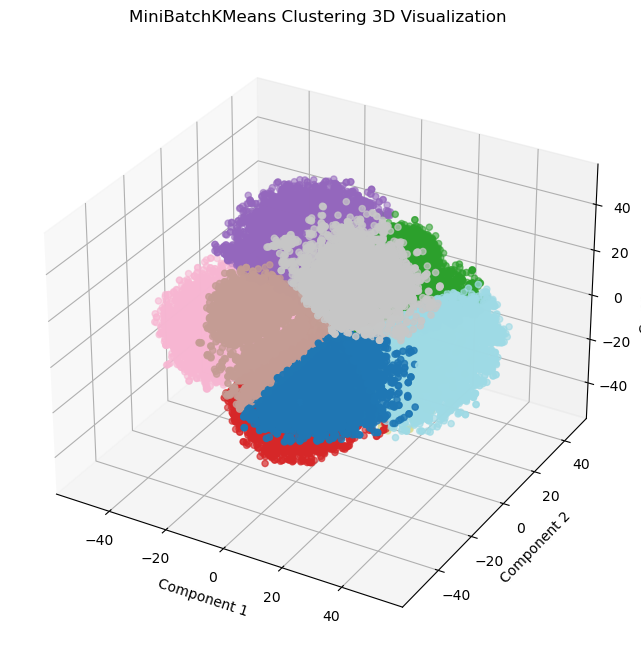

In [40]:
df = pd.DataFrame(tsne_x, columns=['Component 1', 'Component 2', 'Component 3'])
tsne_clusters = MiniBatchKMeans(n_clusters=10, batch_size=4096, random_state=1).fit_predict(tsne_x)
df['Cluster'] = tsne_clusters
processed['tsne_clusters_3d'] = tsne_clusters

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Component 1'], df['Component 2'], df['Component 3'], c=df['Cluster'], cmap='tab20')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('MiniBatchKMeans Clustering 3D Visualization')

plt.show()

As we can see, it does form very distinct clusters

In [41]:
# Assume X is your TF-IDF matrix
# Initialize a TSNE object
tsne = TSNE(n_components=2, random_state=0)

tsne_x_2d = tsne.fit_transform(dtm.toarray())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


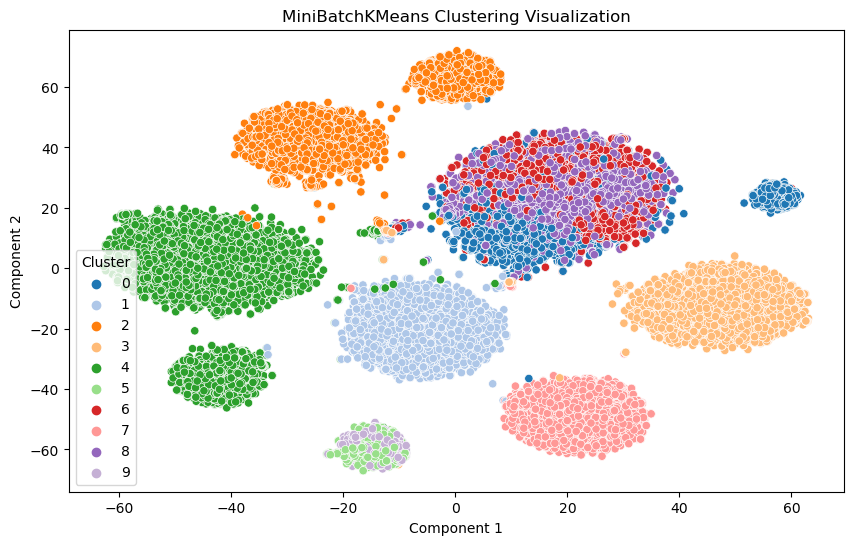

In [47]:
import seaborn as sns
df = pd.DataFrame(tsne_x_2d, columns=['Component 1', 'Component 2'])
tsne_clusters = MiniBatchKMeans(n_clusters=10, batch_size=4096, random_state=1).fit_predict(dtm)
df['Cluster'] = tsne_clusters
processed['tsne_clusters_2d'] = tsne_clusters

# Plot clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='Cluster', palette='tab20')
plt.title('MiniBatchKMeans Clustering Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()

We see that it generates 10 different clusters. What remains to check if these 10 clusters correspond to the 10 different patients.

In [60]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=50, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(tsne_x)

In [61]:
processed['hdbscan_tsne_clusters'] = cluster_labels

Text(0.5, 0.92, 'MiniBatchKMeans Clustering 3D Visualization')

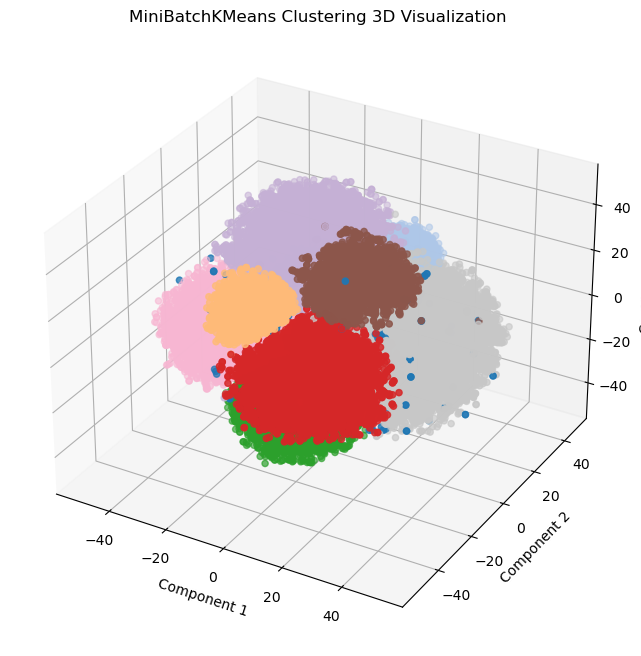

In [66]:
df = pd.DataFrame(tsne_x, columns=['Component 1', 'Component 2', 'Component 3'])
df['Cluster'] = cluster_labels


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Component 1'], df['Component 2'], df['Component 3'], c=df['Cluster'], cmap='tab20')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('MiniBatchKMeans Clustering 3D Visualization')

In [98]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=70, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(tsne_x_2d)

In [99]:
processed['hdbscan_tsne_clusters_2d'] = cluster_labels

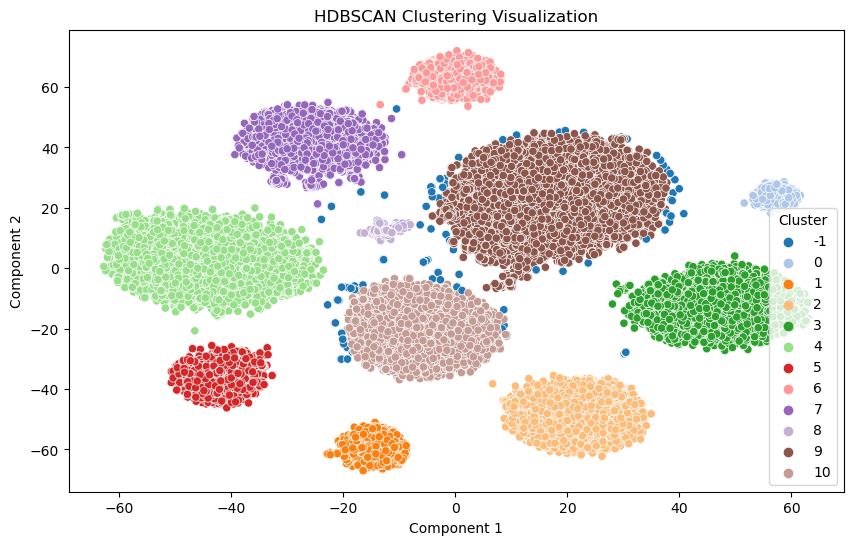

In [100]:
df = pd.DataFrame(tsne_x_2d, columns=['Component 1', 'Component 2'])
df['Cluster'] = cluster_labels


# Plot clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='Cluster', palette='tab20')
plt.title('HDBSCAN Clustering Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()

HDBSCAN does an incredible job identifying the clusters that have formed.

We notice that we have two extra clusters allotted to us.
These may be outliers since they are on the edges of the cluster and incredibly small.

In [101]:
processed['hdbscan_tsne_clusters_2d'].value_counts()

hdbscan_tsne_clusters_2d
 9     9661
 4     6795
 10    5259
 3     5110
 2     4166
 7     4081
 5     2231
 6     1951
 1     1594
 0      802
 8      279
-1      217
Name: count, dtype: int64

As we can see, 2 of these are incredibly small.

In [102]:
# processed.to_csv('data/processed_notes.csv', index=False)

Text(0.5, 0.92, 'MiniBatchKMeans Clustering 3D Visualization')

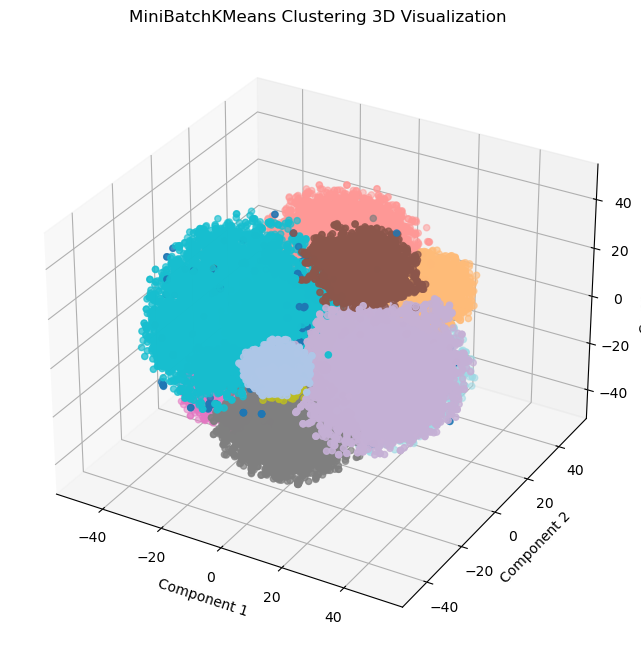

In [103]:
svd = TruncatedSVD(n_components=3)
pca_3d = svd.fit_transform(tsne_x)

df = pd.DataFrame(pca_3d, columns=['Component 1', 'Component 2', 'Component 3'])
df['Cluster'] = cluster_labels


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Component 1'], df['Component 2'], df['Component 3'], c=df['Cluster'], cmap='tab20')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('MiniBatchKMeans Clustering 3D Visualization')

In [59]:
processed

,pn_history,stopwords_removed,corrected_notes,stemmed_notes,case_num,normal_clusters,pca_clusters,hdbscan_clusters,tsne_clusters_3d,tsne_clusters_2d
0,17yearold male has come to the student health ...,17yearold male come student health clinic comp...,year old male come student health clinic compl...,year old male come student health clinic compl...,0,5,1,5,7,4
1,17 yo male with recurrent palpitations for the...,17 yo male recurrent palpitations past 3 mo la...,of to male recurrent palpitations past a to la...,of to male recurr palpit past a to last a a mi...,0,5,1,-1,7,4
2,dillon cleveland is a 17 yo male patient with ...,dillon cleveland 17 yo male patient significan...,dillon cleveland of to male patient significan...,dillon cleveland of to male patient signif pm ...,0,5,1,-1,7,4
3,a 17 yo m co palpitation started 3 mos ago \r\...,17 yo co palpitation started 3 mos ago nothing...,of to co palpitation started a mos ago nothing...,of to co palpit start a mo ago noth improv exa...,0,5,1,5,7,4
4,17yo male with no pmh here for evaluation of p...,17yo male pmh evaluation palpitations states l...,mayo male pm evaluation palpitations states la...,mayo male pm evalu palpit state last demo felt...,0,5,1,5,7,4
...,...,...,...,...,...,...,...,...,...,...
42141,ms madden is a 20 yo female presenting w the w...,ms madden 20 yo female presenting w worst ha l...,is madden of to female presenting a worst a li...,is madden of to femal present a worst a life u...,9,0,0,7,0,3
42142,a 20 yo f came complain a dull 810 headache th...,20 yo f came complain dull 810 headache associ...,of of came complain dull a of headache associa...,of of came complain dull a of headach associ c...,9,0,0,7,0,3
42143,ms madden is a 20yo female who presents with a...,ms madden 20yo female presents headache 1 days...,is madden mayo female presents headache a days...,is madden mayo femal present headach a day dur...,9,0,0,7,0,3
42144,stephanie madden is a 20 year old woman compla...,stephanie madden 20 year old woman complaining...,stephanie madden of year old woman complaining...,stephani madden of year old woman complain hea...,9,0,0,7,0,3


In [121]:
for x in processed['case_num'].unique():
    print(processed.loc[processed['case_num'] == x, 'hdbscan_tsne_clusters_2d'].value_counts())

hdbscan_tsne_clusters_2d
 5    2225
 8      21
 4      12
-1       5
 9       4
 7       1
Name: count, dtype: int64
hdbscan_tsne_clusters_2d
0    802
8      5
9      1
Name: count, dtype: int64
hdbscan_tsne_clusters_2d
 6    1950
 8       4
 7       3
-1       1
Name: count, dtype: int64
hdbscan_tsne_clusters_2d
 9    9574
-1     108
 8      68
 7       3
Name: count, dtype: int64
hdbscan_tsne_clusters_2d
 10    5256
-1       55
 9       47
 8       34
 4        5
 2        3
 7        2
 5        2
 6        1
Name: count, dtype: int64
hdbscan_tsne_clusters_2d
 4     6776
 8       91
-1       29
 5        4
 7        4
 10       2
 9        2
 2        1
Name: count, dtype: int64
hdbscan_tsne_clusters_2d
1    1594
8       3
Name: count, dtype: int64
hdbscan_tsne_clusters_2d
 7    4068
 8      24
-1       6
 4       2
 9       1
Name: count, dtype: int64
hdbscan_tsne_clusters_2d
 2    4161
 9      20
 8       8
-1       7
Name: count, dtype: int64
hdbscan_tsne_clusters_2d
 3     5110


We see that for HDBSCAN using t-sne as a dimensionality reduction method, we can classify the cases by case numbers pretty well - with a small misclassification error.


Let us see if other techniques hold up to this

In [122]:
for x in processed['case_num'].unique():
    print(processed.loc[processed['case_num'] == x, 'hdbscan_tsne_clusters'].value_counts())

hdbscan_tsne_clusters
 7     1259
-1      989
 5       13
 8        5
 12       2
Name: count, dtype: int64
hdbscan_tsne_clusters
 6     507
-1     296
 5       4
 12      1
Name: count, dtype: int64
hdbscan_tsne_clusters
 2    1172
-1     784
 5       2
Name: count, dtype: int64
hdbscan_tsne_clusters
-1     7223
 12    2358
 10     141
 5       30
 1        1
Name: count, dtype: int64
hdbscan_tsne_clusters
-1     3487
 12    1899
 5       17
 9        1
 8        1
Name: count, dtype: int64
hdbscan_tsne_clusters
-1     3710
 8     3036
 0       83
 5       70
 12       9
 4        1
Name: count, dtype: int64
hdbscan_tsne_clusters
 8    1010
-1     583
 5       4
Name: count, dtype: int64
hdbscan_tsne_clusters
-1    2076
 3    1875
 4      78
 1      65
 5       6
 2       1
Name: count, dtype: int64
hdbscan_tsne_clusters
-1     2225
 9     1954
 12       9
 5        8
Name: count, dtype: int64
hdbscan_tsne_clusters
-1     3298
 12    1738
 11     103
 5       12
Name: count, dtype: in

HDBSCAN in 3 dimensions suffers, possibly due to improper hyperparameters.

In [124]:
for x in processed['case_num'].unique():
    print(processed.loc[processed['case_num'] == x, 'tsne_clusters_3d'].value_counts())

tsne_clusters_3d
7    2230
2      24
5      10
4       2
9       1
6       1
Name: count, dtype: int64
tsne_clusters_3d
2    807
5      1
Name: count, dtype: int64
tsne_clusters_3d
8    1944
1       9
2       4
3       1
Name: count, dtype: int64
tsne_clusters_3d
9    4843
2    2608
8    1148
7     511
0     332
3     219
5      64
1      23
6       5
Name: count, dtype: int64
tsne_clusters_3d
6    4980
5     199
1     154
2      35
3      28
8       6
4       2
7       1
Name: count, dtype: int64
tsne_clusters_3d
4    5160
7     751
2     486
5     225
1     199
6      83
3       4
8       1
Name: count, dtype: int64
tsne_clusters_3d
5    1593
2       4
Name: count, dtype: int64
tsne_clusters_3d
1    3698
8     207
2     187
3       6
5       1
7       1
6       1
Name: count, dtype: int64
tsne_clusters_3d
3    4108
8      77
2       8
5       3
Name: count, dtype: int64
tsne_clusters_3d
0    3567
5    1477
7      55
3      28
2      22
1       2
Name: count, dtype: int64


Again, K-Means clustering does not genralize on patterns based on case_no.

In [125]:
for x in processed['case_num'].unique():
    print(processed.loc[processed['case_num'] == x, 'normal_clusters'].value_counts())

normal_clusters
5    2236
3      31
6       1
Name: count, dtype: int64
normal_clusters
3    808
Name: count, dtype: int64
normal_clusters
4    1947
3      10
6       1
Name: count, dtype: int64
normal_clusters
1    9735
3      18
Name: count, dtype: int64
normal_clusters
7    3361
6    2036
3       8
Name: count, dtype: int64
normal_clusters
8    5627
3    1278
5       3
4       1
Name: count, dtype: int64
normal_clusters
9    1593
3       4
Name: count, dtype: int64
normal_clusters
4    4077
3      24
Name: count, dtype: int64
normal_clusters
2    4189
3       4
6       3
Name: count, dtype: int64
normal_clusters
0    5139
3      12
Name: count, dtype: int64


Finally, when we do not perform PCA before generating the clusters, K Means still does surprisingly well even if the dimensionality is high. It doesn't do as well as HDBSCAN, though.